_Ilhem OUASSINI , I2-APP RS1_

__Dans ce notebook, vous trouverez le code, les commentaires, ainsi que les résultats obtenus. Le rapport "Projet_Ilhem_OUASSINI_I2-RS1" fournit une analyse détaillée et une interprétation approfondie de ces résultats.__

# Project: Intrusion Detection System Using Machine Learning

## Chargement de la dataset (seed value 110)

In [5]:
#! /bin/python
# -*- coding: utf-8 -*-
#
#  data_generator.py
#
#  this script is to generate a random dataset from the originial one

import numpy as np
import pandas as pd


def data_generator(data):
    """

    @param data:
    @param seed:
    @return:
    """
    y = data['outcome']
    X = data.drop(['outcome'],axis=1)
    indexes_cols_drop = np.random.randint(len(X.columns),size=10)
    columns = list(X.columns)
    X = X.drop([columns[i] for i in range(len(columns)) if i in indexes_cols_drop],axis=1)
    nb_rows = np.random.randint(7000,len(X))
    indexes_rows = np.random.randint(len(X),size = nb_rows)
    data_for_project = pd.concat([X,y],axis=1)
    data_for_project = data_for_project.loc[indexes_rows,:]
    return data_for_project


if __name__ == '__main__':
    np.random.seed(110)  ### Change seed number to your corresponding seed_value given in the excel sheet
    data = pd.read_csv("Dataset_project_RS.csv", index_col=0)
    data_for_project = data_generator(data)
    data_for_project.to_csv('datasetGenerated.csv') ## if you want to save the dataset to avoid regenerating the dataset each time
    ### to read the generated csv in a notebook or script
    df = pd.read_csv('datasetGenerated.csv', index_col=[0]) 


In [6]:
df

,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,outcome
18053,icmp,ecr_i,SF,1032,0,0,0,0,0,0,...,255,132,0.52,0.00,0.00,0.00,0.00,0.00,19,smurf
17824,tcp,http,SF,295,2000,0,0,0,1,0,...,6,255,1.00,0.04,0.00,0.00,0.00,0.00,21,normal
81617,tcp,telnet,RSTR,39,51,0,0,0,0,0,...,255,70,0.27,0.00,0.33,0.57,0.01,0.03,4,normal
108283,tcp,other,REJ,0,0,0,0,0,0,0,...,255,1,0.00,0.00,0.25,0.00,0.75,1.00,20,satan
124385,tcp,echo,S0,0,0,0,0,0,0,0,...,255,20,0.08,0.00,1.00,1.00,0.00,0.00,20,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87484,udp,domain_u,SF,45,45,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,18,normal
106514,tcp,private,OTH,0,0,0,0,0,0,0,...,188,1,0.01,0.00,0.03,0.00,0.62,0.00,12,portsweep
85892,tcp,smtp,SF,765,329,0,0,0,1,0,...,150,97,0.29,0.02,0.00,0.00,0.00,0.00,21,normal
94678,tcp,http,SF,298,3897,0,0,0,1,0,...,30,255,1.00,0.05,0.00,0.00,0.00,0.00,21,normal


In [7]:
df['outcome'].value_counts()

outcome
normal             40558
neptune            24420
satan               2234
ipsweep             2052
portsweep           1763
smurf               1541
nmap                 898
back                 580
teardrop             538
warezclient          517
pod                  126
guess_passwd          31
buffer_overflow       13
rootkit               11
warezmaster           10
imap                   9
ftp_write              7
land                   6
multihop               5
loadmodule             5
phf                    3
spy                    1
perl                   1
Name: count, dtype: int64

## Catégories d'attaques par type

In [9]:
import pandas as pd

# Définition des types d'attaques en fonction des catégories fournies
dos_attacks = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
probe_attacks = ['ipsweep', 'nmap', 'portsweep', 'satan']
u2r_attacks = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
r2l_attacks = ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']

# Catégories d'attaques (Normal, DoS, Probe, U2R, R2L)
attack_labels = ['Normal', 'DoS', 'Probe', 'U2R', 'R2L']

# Fonction de mappage pour classifier les attaques
def map_attack(attack):
    if attack in dos_attacks:
        # DoS attacks mappées à 1
        attack_type = 1
    elif attack in probe_attacks:
        # Probe attacks mappées à 2
        attack_type = 2
    elif attack in u2r_attacks:
        # U2R attacks mappées à 3
        attack_type = 3
    elif attack in r2l_attacks:
        # R2L attacks mappées à 4
        attack_type = 4
    else:
        # Normal mappé à 0
        attack_type = 0
    return attack_type

# Map the data and join to the data set
attack_map = df['outcome'].apply(map_attack)
df['attack_map'] = attack_map

# Affichage des premières lignes du DataFrame pour vérifier les résultats
df.head()


,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,outcome,attack_map
18053,icmp,ecr_i,SF,1032,0,0,0,0,0,0,...,132,0.52,0.00,0.00,0.00,0.00,0.00,19,smurf,1
17824,tcp,http,SF,295,2000,0,0,0,1,0,...,255,1.00,0.04,0.00,0.00,0.00,0.00,21,normal,0
81617,tcp,telnet,RSTR,39,51,0,0,0,0,0,...,70,0.27,0.00,0.33,0.57,0.01,0.03,4,normal,0
108283,tcp,other,REJ,0,0,0,0,0,0,0,...,1,0.00,0.00,0.25,0.00,0.75,1.00,20,satan,2
124385,tcp,echo,S0,0,0,0,0,0,0,0,...,20,0.08,0.00,1.00,1.00,0.00,0.00,20,neptune,1


In [10]:
# Affichage de la répartition des classes
class_distribution = df['attack_map'].value_counts()
print("Répartition des classes dans 'attack_map' :")
print(class_distribution)

# Affichage de la répartition des classes originales
outcome_distribution = df['outcome'].value_counts()
print("\nRépartition des classes originales dans 'outcome' :")
print(outcome_distribution)

Répartition des classes dans 'attack_map' :
attack_map
0    40558
1    27211
2     6947
4      583
3       30
Name: count, dtype: int64

Répartition des classes originales dans 'outcome' :
outcome
normal             40558
neptune            24420
satan               2234
ipsweep             2052
portsweep           1763
smurf               1541
nmap                 898
back                 580
teardrop             538
warezclient          517
pod                  126
guess_passwd          31
buffer_overflow       13
rootkit               11
warezmaster           10
imap                   9
ftp_write              7
land                   6
multihop               5
loadmodule             5
phf                    3
spy                    1
perl                   1
Name: count, dtype: int64


In [11]:
df.dtypes

protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

## Rapport d'analyse du dataset généré

In [13]:
%pip install --upgrade jupyter ipywidgets
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [14]:
# importe la bibliothèque pandas pour la manipulation des données
import pandas as pd
# ProfileReport pour générer des rapports 
from ydata_profiling import ProfileReport
# changement du fichier CSV contenant les données IoT dans 

# création d'un rapport 
profile = ProfileReport(df, title=" Intrusion Detection System Dataset Profiling Report", explorative=True)
# exporte le rapport sous format HTML
profile.to_file("dataset_110_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ouass\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Vérification des données manquantes

In [16]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("\nNombre de valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Remplir les valeurs manquantes par la moyenne (pour les colonnes numériques)
df.fillna(df.mean(numeric_only=True), inplace=True)


Nombre de valeurs manquantes par colonne :
Series([], dtype: int64)


## Elimination des doublons

In [18]:
#doublons
import pandas as pd


# Affichage du nombre de doublons avant suppression
print("Nombre de doublons avant suppression:", df.duplicated().sum())

# Suppression des doublons
df_cleaned = df.drop_duplicates()

# Affichage du nombre de doublons après suppression
print("Nombre de doublons après suppression:", df_cleaned.duplicated().sum())



Nombre de doublons avant suppression: 20141
Nombre de doublons après suppression: 0


## Identification des Corrélations Élevées entre les Variables Numériques

In [20]:
import math
import matplotlib.pyplot as plt

numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns  ## print this variable to see its values
df_numeric_categorical = df[numeric_categorical_features]

correlation_matrix = df_numeric_categorical.corr().values
threshold = 0.5
num_rows, num_cols = correlation_matrix.shape
dataFound = []

for i in range(num_rows):
    for j in range(i):
        value = correlation_matrix[i, j]
        value = abs(value)
        if value > threshold:
            dataFound.append([df_numeric_categorical.columns[i], df_numeric_categorical.columns[j], value])

result_df = pd.DataFrame(dataFound, columns=['Column 1', 'Column 2', 'Correlation'])
result_df = result_df.sort_values(by='Correlation', ascending=False)

result_df

,Column 1,Column 2,Correlation
4,srv_rerror_rate,rerror_rate,0.989366
25,dst_host_srv_serror_rate,dst_host_serror_rate,0.985293
21,dst_host_srv_serror_rate,serror_rate,0.981956
17,dst_host_serror_rate,serror_rate,0.979269
29,dst_host_srv_rerror_rate,srv_rerror_rate,0.970556
28,dst_host_srv_rerror_rate,rerror_rate,0.964065
26,dst_host_rerror_rate,rerror_rate,0.926379
30,dst_host_srv_rerror_rate,dst_host_rerror_rate,0.925922
27,dst_host_rerror_rate,srv_rerror_rate,0.918277
16,dst_host_same_srv_rate,dst_host_srv_count,0.897598


<Axes: >

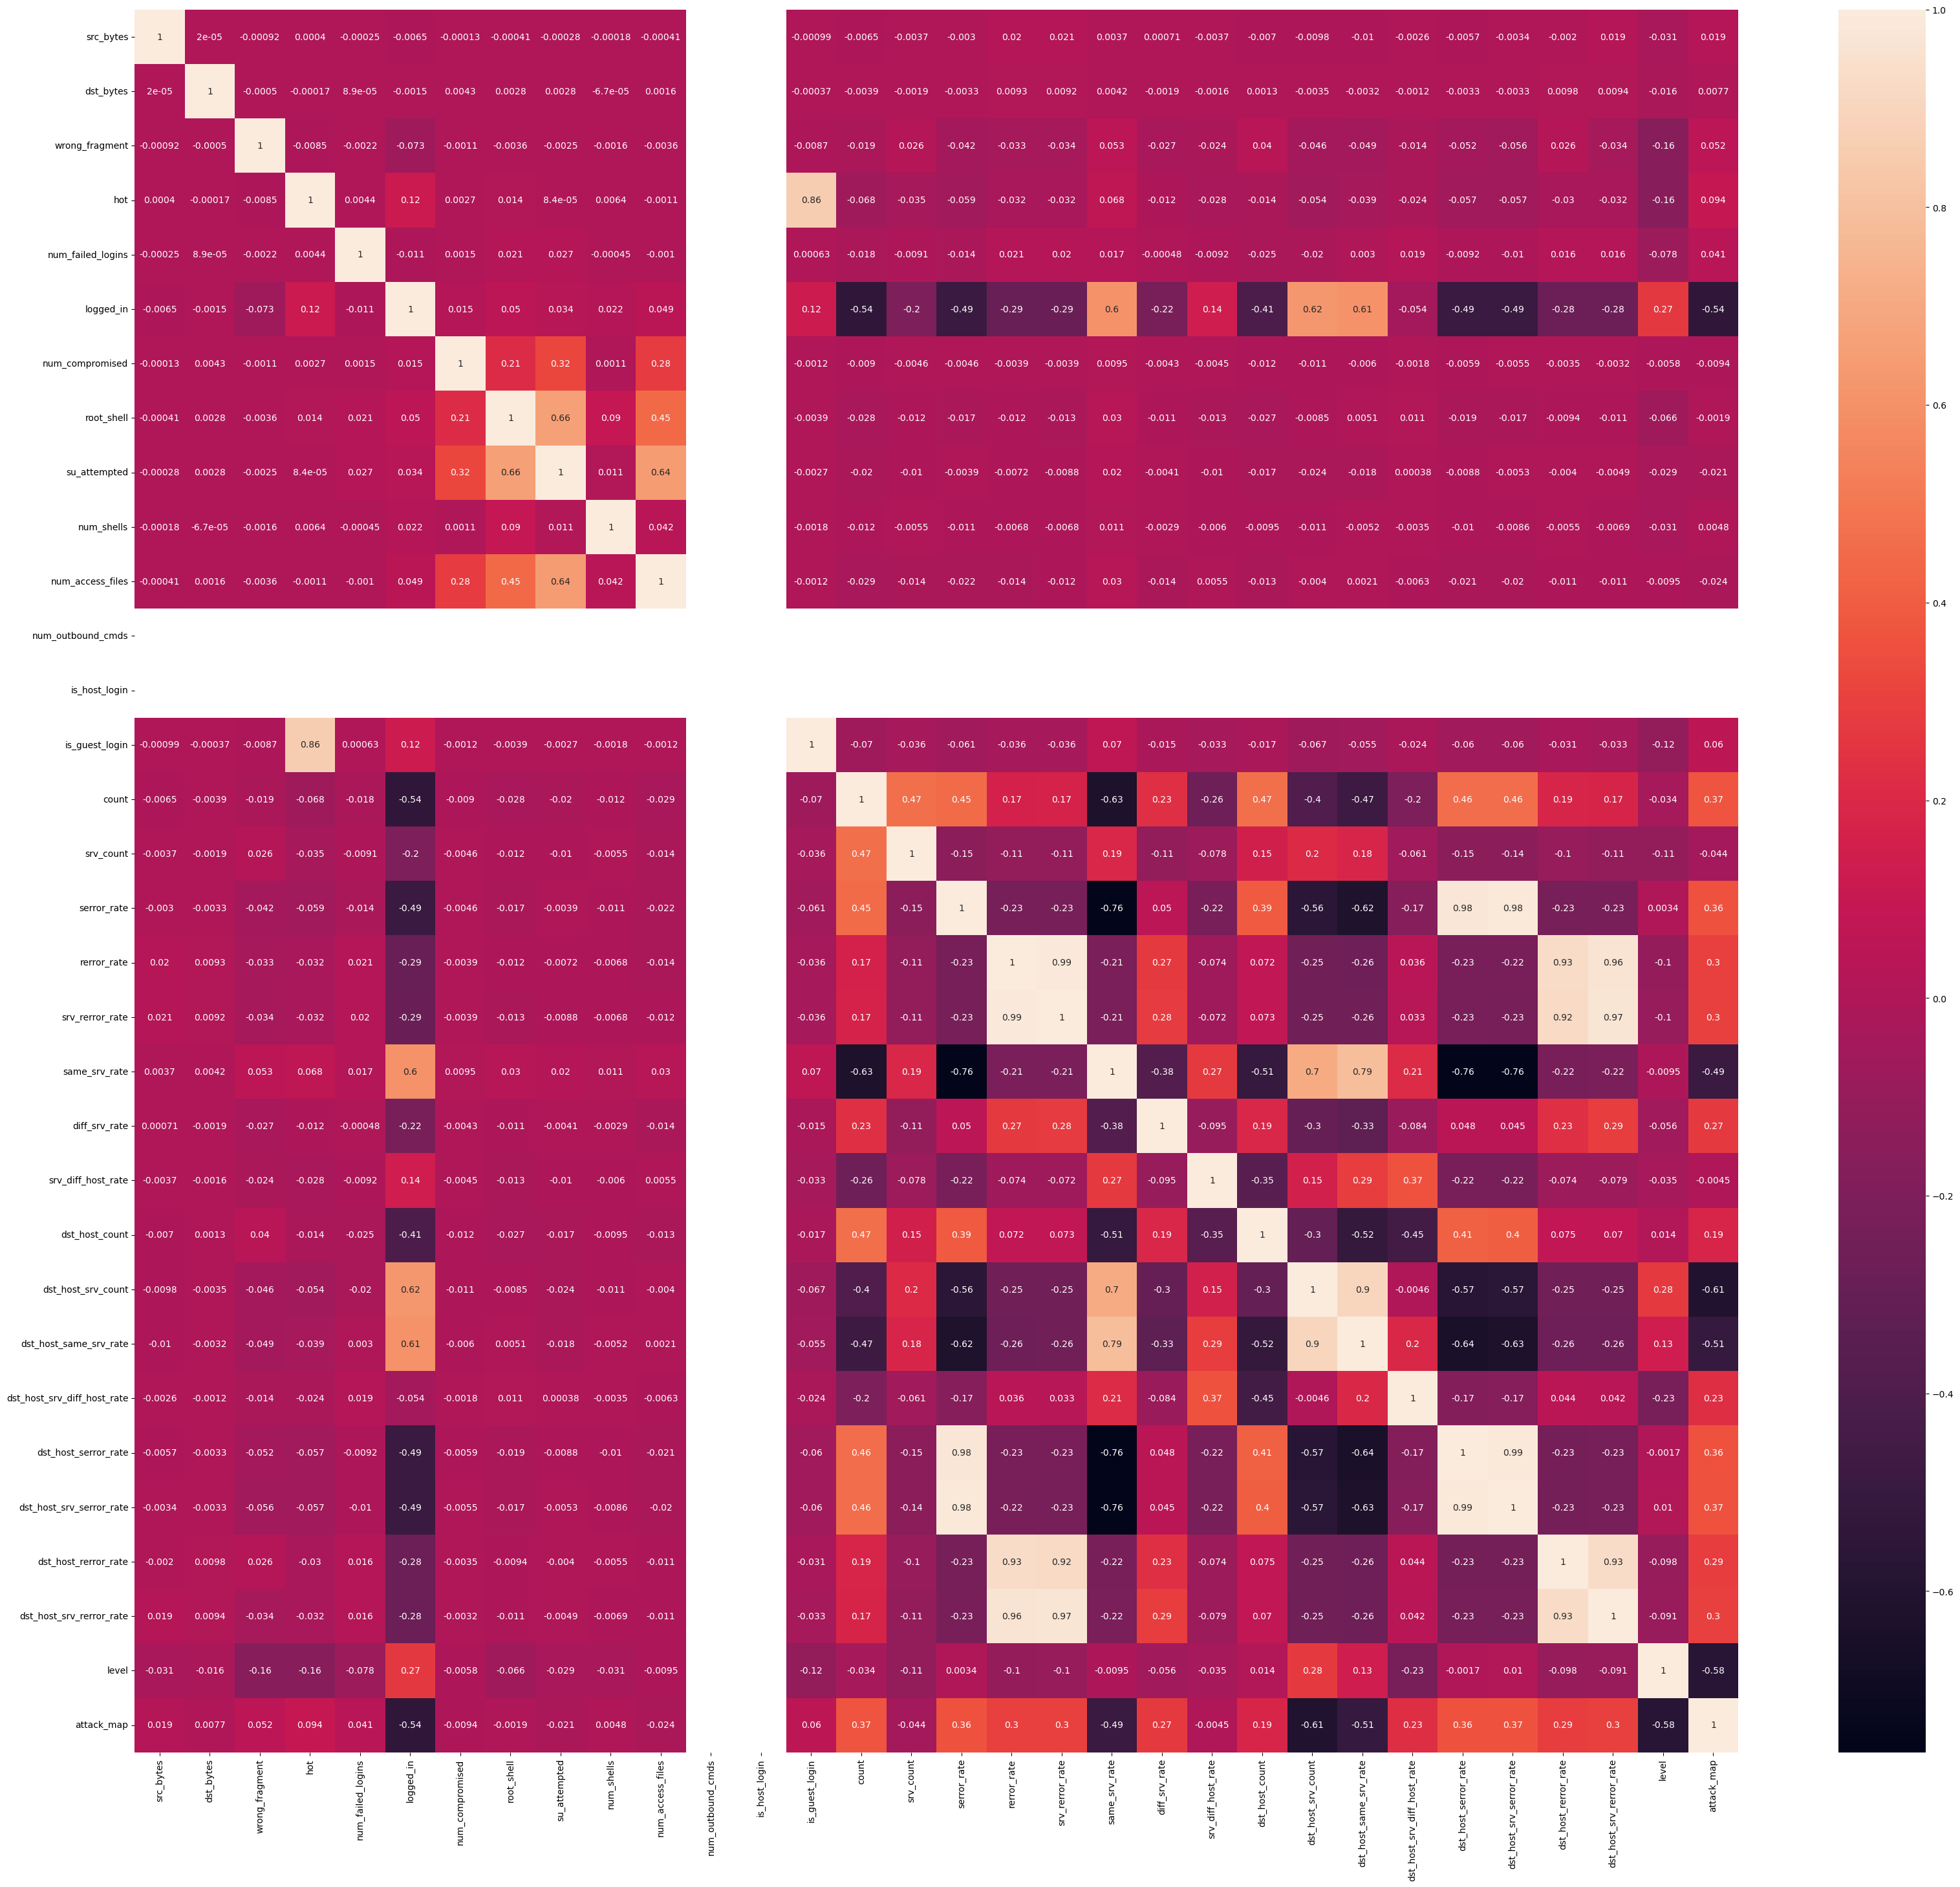

In [21]:
import seaborn as sns
plt.figure(figsize=(40,35))
sns.heatmap(df_numeric_categorical.corr(), annot= True)

In [22]:
df["attack_map"].unique()

array([1, 0, 2, 4, 3], dtype=int64)

In [23]:
df

,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,outcome,attack_map
18053,icmp,ecr_i,SF,1032,0,0,0,0,0,0,...,132,0.52,0.00,0.00,0.00,0.00,0.00,19,smurf,1
17824,tcp,http,SF,295,2000,0,0,0,1,0,...,255,1.00,0.04,0.00,0.00,0.00,0.00,21,normal,0
81617,tcp,telnet,RSTR,39,51,0,0,0,0,0,...,70,0.27,0.00,0.33,0.57,0.01,0.03,4,normal,0
108283,tcp,other,REJ,0,0,0,0,0,0,0,...,1,0.00,0.00,0.25,0.00,0.75,1.00,20,satan,2
124385,tcp,echo,S0,0,0,0,0,0,0,0,...,20,0.08,0.00,1.00,1.00,0.00,0.00,20,neptune,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87484,udp,domain_u,SF,45,45,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,18,normal,0
106514,tcp,private,OTH,0,0,0,0,0,0,0,...,1,0.01,0.00,0.03,0.00,0.62,0.00,12,portsweep,2
85892,tcp,smtp,SF,765,329,0,0,0,1,0,...,97,0.29,0.02,0.00,0.00,0.00,0.00,21,normal,0
94678,tcp,http,SF,298,3897,0,0,0,1,0,...,255,1.00,0.05,0.00,0.00,0.00,0.00,21,normal,0


## Distribution des Catégories d'Attaques en Fonction des Différentes Valeurs de 'Flag'

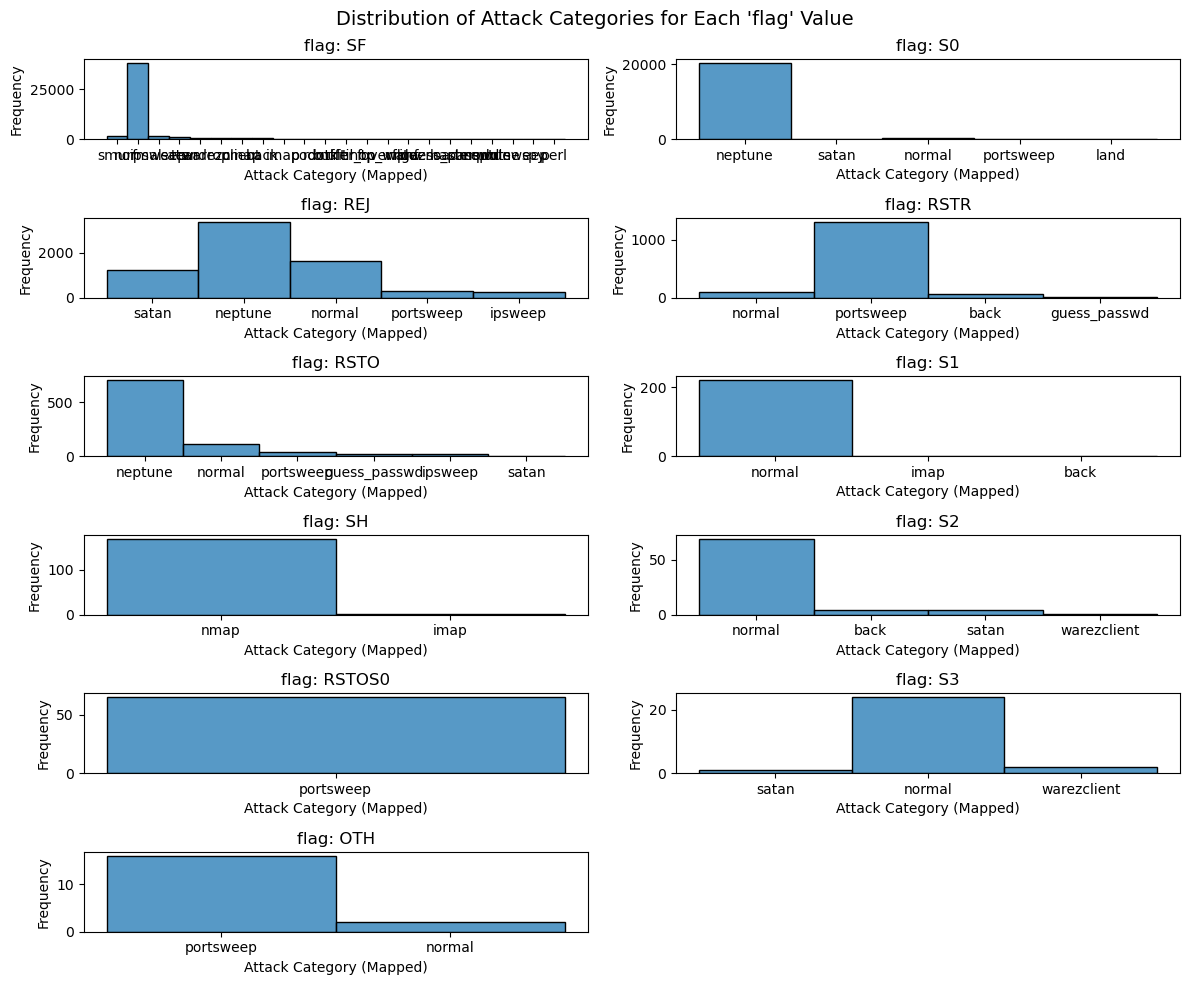

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la caractéristique
feature = 'flag'

# Valeurs uniques de la caractéristique
unique_features = df[feature].unique()
value_frequencies = df[feature].value_counts()
sorted_features = value_frequencies.index.tolist()
num_plots = len(unique_features)
num_cols = 2  # Nombre de colonnes pour les sous-graphiques
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle(f"Distribution of Attack Categories for Each '{feature}' Value", fontsize=14, ha='center')

# Parcourir les valeurs uniques de la caractéristique et tracer les distributions
for i, feat in enumerate(sorted_features):
    feat_df = df[df[feature] == feat]  # Filtrer les données par valeur de `flag`
    unique_attacks = feat_df['outcome'].unique()  # Récupérer les catégories uniques
    
    row = i // num_cols  # Calculer l'indice de la ligne
    col = i % num_cols  # Calculer l'indice de la colonne
    ax = axes[row, col]  # Sélectionner le sous-graphe approprié
    
    sns.histplot(feat_df['outcome'], bins=len(unique_attacks), ax=ax, discrete=True)  # Tracer l'histogramme
    ax.set_xlabel('Attack Category (Mapped)')  # Label de l'axe x
    ax.set_ylabel('Frequency')  # Label de l'axe y
    ax.set_title(f"{feature}: {feat}")  # Titre du sous-graphe

# Supprimer les sous-graphiques vides, s'il y en a
if num_plots < num_rows * num_cols:
    empty_plots = num_rows * num_cols - num_plots
    for i in range(num_plots, num_plots + empty_plots):
        fig.delaxes(axes[i // num_cols, i % num_cols])  # Supprimer les sous-graphiques inutilisés

plt.tight_layout()  # Ajuster l'espacement
plt.show()  # Afficher la figure


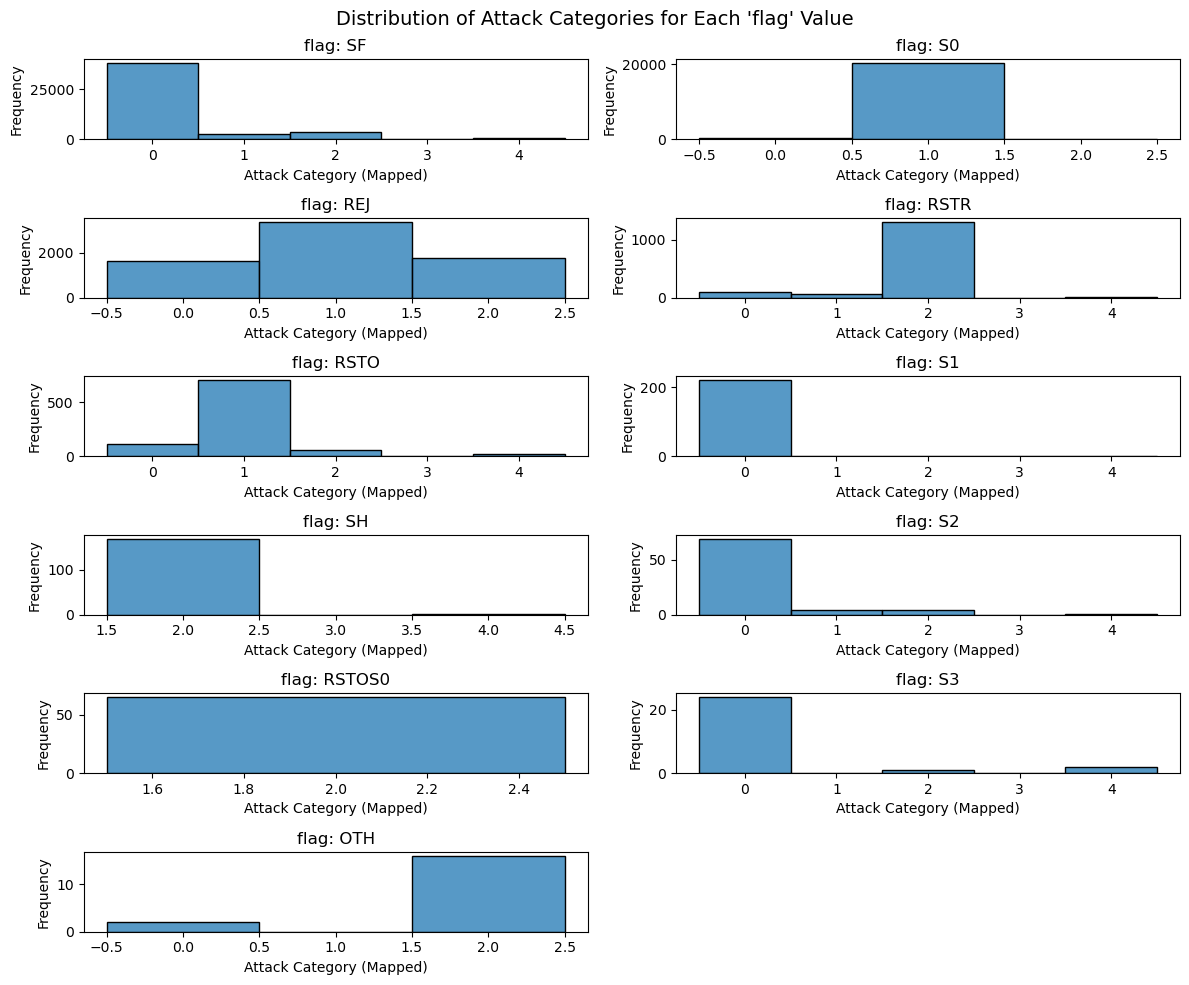

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la caractéristique
feature = 'flag'

# Valeurs uniques de la caractéristique
unique_features = df[feature].unique()
value_frequencies = df[feature].value_counts()
sorted_features = value_frequencies.index.tolist()
num_plots = len(unique_features)
num_cols = 2  # Nombre de colonnes pour les sous-graphiques
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle(f"Distribution of Attack Categories for Each '{feature}' Value", fontsize=14, ha='center')

# Parcourir les valeurs uniques de la caractéristique et tracer les distributions de `attack_map`
for i, feat in enumerate(sorted_features):
    feat_df = df[df[feature] == feat]  # Filtrer les données par valeur de `flag`
    unique_attacks = feat_df['attack_map'].unique()  # Récupérer les catégories uniques de `attack_map`
    
    row = i // num_cols  # Calculer l'indice de la ligne
    col = i % num_cols  # Calculer l'indice de la colonne
    ax = axes[row, col]  # Sélectionner le sous-graphe approprié
    
    sns.histplot(feat_df['attack_map'], bins=len(unique_attacks), ax=ax, discrete=True)  # Tracer l'histogramme
    ax.set_xlabel('Attack Category (Mapped)')  # Label de l'axe x
    ax.set_ylabel('Frequency')  # Label de l'axe y
    ax.set_title(f"{feature}: {feat}")  # Titre du sous-graphe

# Supprimer les sous-graphiques vides, s'il y en a
if num_plots < num_rows * num_cols:
    empty_plots = num_rows * num_cols - num_plots
    for i in range(num_plots, num_plots + empty_plots):
        fig.delaxes(axes[i // num_cols, i % num_cols])  # Supprimer les sous-graphiques inutilisés

plt.tight_layout()  # Ajuster l'espacement
plt.show()  # Afficher la figure

Interprétation :

Ce graphique montre la distribution des catégories d'attaques pour chaque valeur de la variable "flag". On observe que certaines valeurs de "flag" (comme "SF" et "SO") sont associées à un large nombre de catégories d'attaques. Tandis que d'autres (comme "SH", "RSTOS0" et "OTH") sont principalement associées à une seule catégorie. Cela suggère que la variable "flag" joue un rôle différencié dans la caractérisation des types d’attaques réseau, avec certaines valeurs plus spécifiques à certains types d'attaques que d'autres.

## Encodage des valeurs catégorielles

In [29]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder pour chaque colonne catégorielle
label_encoder_protocol = LabelEncoder()
label_encoder_service = LabelEncoder()
label_encoder_flag = LabelEncoder()

# Encoder les colonnes
df['protocol_type'] = label_encoder_protocol.fit_transform(df['protocol_type'])
df['service'] = label_encoder_service.fit_transform(df['service'])
df['flag'] = label_encoder_flag.fit_transform(df['flag'])

print("\nAperçu des données après encodage :")
print(df.head())


Aperçu des données après encodage :
        protocol_type  service  flag  src_bytes  dst_bytes  wrong_fragment  \
18053               0       14     9       1032          0               0   
17824               1       23     9        295       2000               0   
81617               1       58     4         39         51               0   
108283              1       42     1          0          0               0   
124385              1       12     5          0          0               0   

        hot  num_failed_logins  logged_in  num_compromised  ...  \
18053     0                  0          0                0  ...   
17824     0                  0          1                0  ...   
81617     0                  0          0                0  ...   
108283    0                  0          0                0  ...   
124385    0                  0          0                0  ...   

        dst_host_srv_count  dst_host_same_srv_rate  \
18053                  132           

In [30]:
df

,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,outcome,attack_map
18053,0,14,9,1032,0,0,0,0,0,0,...,132,0.52,0.00,0.00,0.00,0.00,0.00,19,smurf,1
17824,1,23,9,295,2000,0,0,0,1,0,...,255,1.00,0.04,0.00,0.00,0.00,0.00,21,normal,0
81617,1,58,4,39,51,0,0,0,0,0,...,70,0.27,0.00,0.33,0.57,0.01,0.03,4,normal,0
108283,1,42,1,0,0,0,0,0,0,0,...,1,0.00,0.00,0.25,0.00,0.75,1.00,20,satan,2
124385,1,12,5,0,0,0,0,0,0,0,...,20,0.08,0.00,1.00,1.00,0.00,0.00,20,neptune,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87484,2,11,9,45,45,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,18,normal,0
106514,1,47,0,0,0,0,0,0,0,0,...,1,0.01,0.00,0.03,0.00,0.62,0.00,12,portsweep,2
85892,1,52,9,765,329,0,0,0,1,0,...,97,0.29,0.02,0.00,0.00,0.00,0.00,21,normal,0
94678,1,23,9,298,3897,0,0,0,1,0,...,255,1.00,0.05,0.00,0.00,0.00,0.00,21,normal,0


## Matrice de corrélation avant la suppression des colonnes

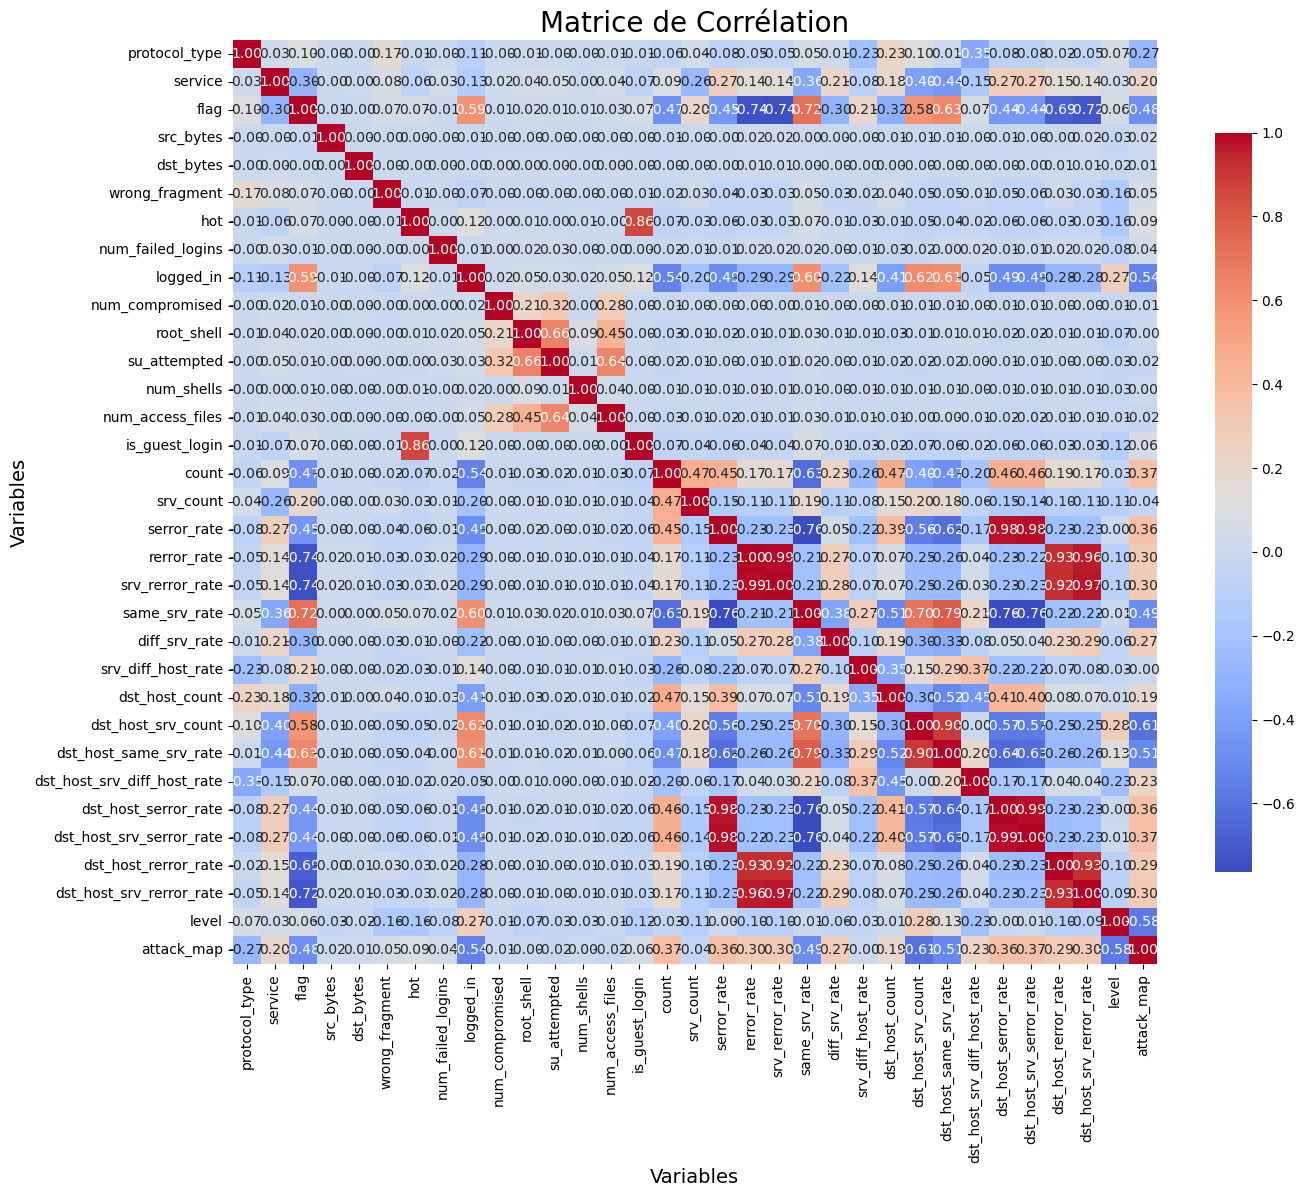

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df est déjà chargé avec votre dataset

# Supprimer les colonnes avec NaN
df = df.dropna(axis='columns')

# Garder les colonnes ayant plus d'une valeur unique et qui sont numériques
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]

# Calculer la matrice de corrélation
corr = ndf.corr()

# Configurer la taille de la figure
plt.figure(figsize=(15, 12))

# Créer la heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Ajouter des titres et des labels
plt.title('Matrice de Corrélation', fontsize=20)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Afficher la heatmap
plt.show()

In [33]:
data["outcome"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

## Suppression des colonnes peu pertinentes

In [35]:
# Suppression des colonnes identifiées
columns_to_drop = [
    'num_outbound_cmds', 
    'is_host_login', 
    'flag', 
    'wrong_fragment', 
    'root_shell', 
    'su_attempted', 
    'num_shells', 
    'is_guest_login',
    'hot', 
    'num_failed_logins', 
    'num_compromised', 
    'num_access_files',
    'serror_rate', 
    'rerror_rate', 
    'srv_rerror_rate', 
    'same_srv_rate', 
    'diff_srv_rate', 
    'srv_diff_host_rate', 
    'dst_host_same_srv_rate', 
    'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 
    'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate'  
]

df.drop(columns=columns_to_drop, inplace=True)

# Vérifier les colonnes restantes
print(df.columns)

Index(['protocol_type', 'service', 'src_bytes', 'dst_bytes', 'logged_in',
       'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'level',
       'outcome', 'attack_map'],
      dtype='object')


## Normalisation des données numériques

In [37]:
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques et la variable cible
X = df.drop(columns=['attack_map', 'outcome'])
y = df['attack_map']

# Appliquer le scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer un DataFrame des données mises à l'échelle pour visualisation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nAperçu des données après scaling :")
print(X_scaled_df.head())


Aperçu des données après scaling :
   protocol_type   service  src_bytes  dst_bytes  logged_in     count  \
0      -2.489795 -1.001973  -0.010185  -0.005538  -0.815129  0.420981   
1      -0.133148 -0.435203  -0.010263  -0.004168   1.226800 -0.680116   
2      -0.133148  1.768904  -0.010290  -0.005503  -0.815129 -0.723810   
3      -0.133148  0.761312  -0.010294  -0.005538  -0.815129  3.724273   
4      -0.133148 -1.127922  -0.010294  -0.005538  -0.815129  1.513339   

   srv_count  dst_host_count  dst_host_srv_count     level  
0   1.446510        0.735942            0.141822 -0.222553  
1  -0.299841       -1.778920            1.252104  0.649835  
2  -0.369140        0.735942           -0.417832 -6.765458  
3  -0.369140        0.735942           -1.040673  0.213641  
4  -0.105802        0.735942           -0.869166  0.213641  


## Visualisation des distributions de caractéristiques à l'aide de Boxplots

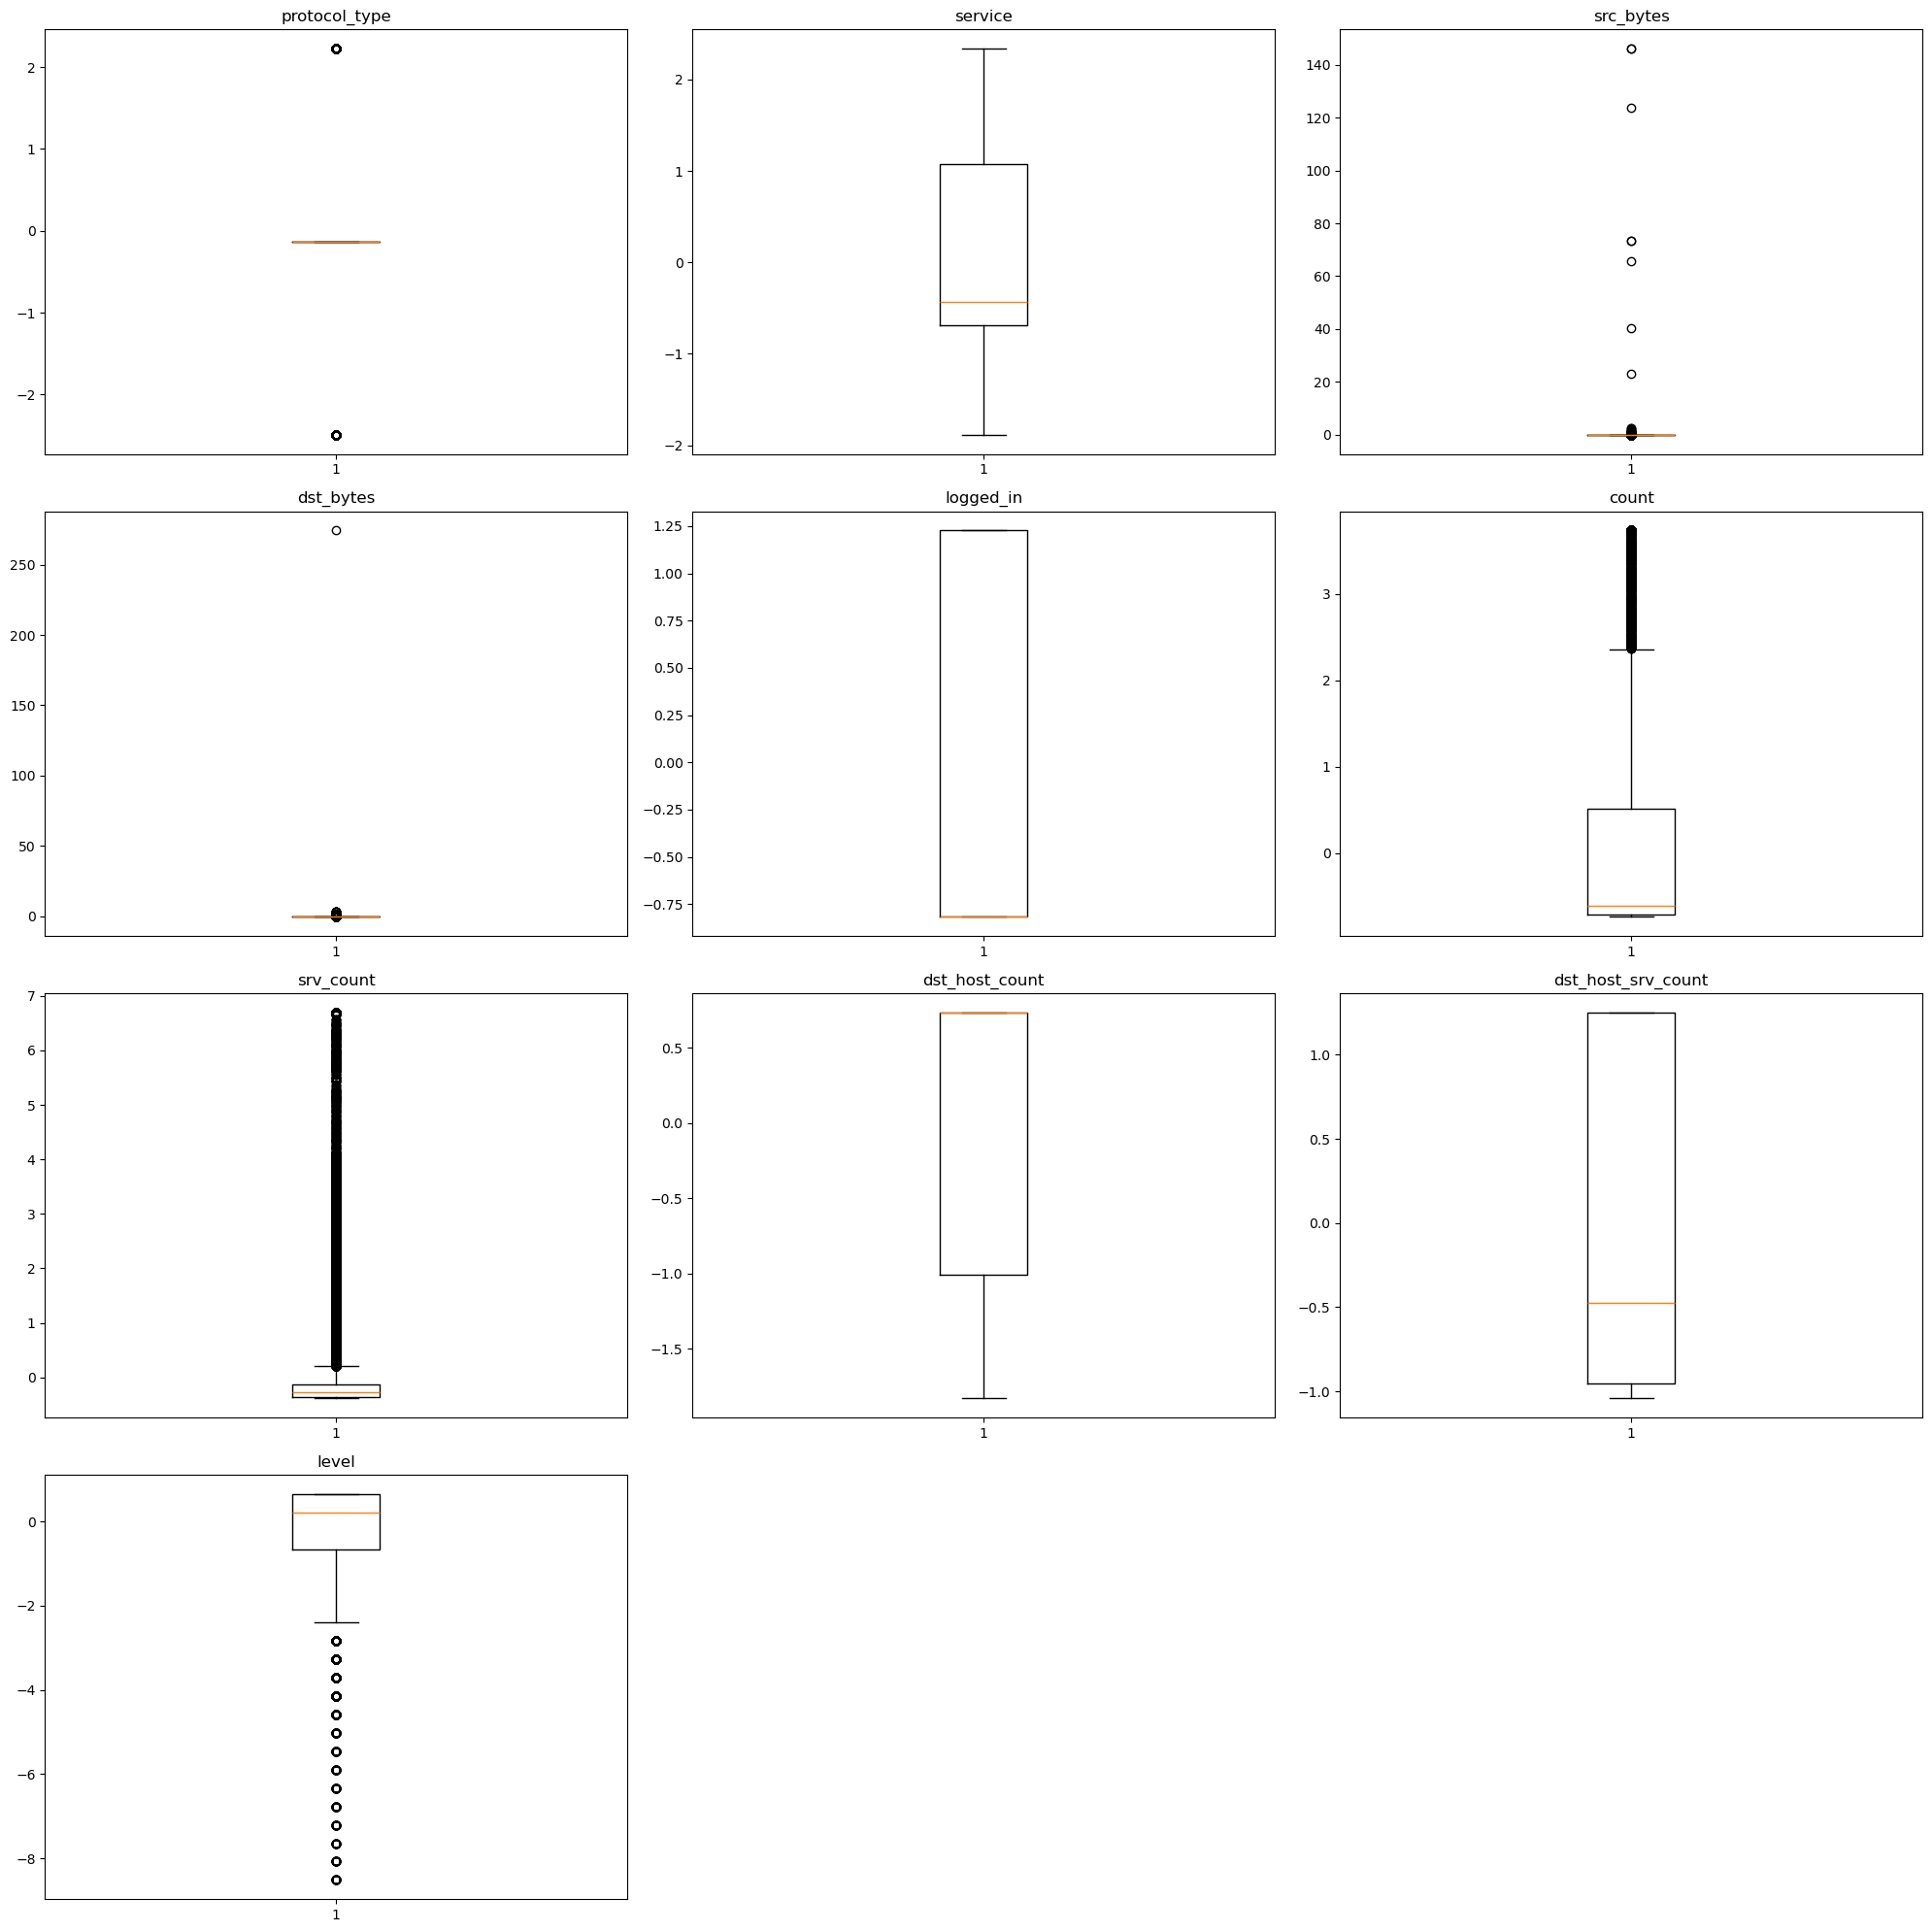

In [39]:
import math
import matplotlib.pyplot as plt

def showBoxplot(df, features):
    num_plots = len(features)
    num_rows = math.ceil(math.sqrt(num_plots))
    num_cols = math.ceil(num_plots / num_rows)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5)

    # Supprimer les sous-graphiques en excès, s'il y en a
    if num_plots % num_cols != 0:
        empty_plots = num_cols - (num_plots % num_cols)
        for i in range(empty_plots):
            fig.delaxes(axes[-1, -1 - i])

    # Générer les boxplots pour chaque caractéristique
    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col] if num_rows > 1 else axes[col]

        ax.boxplot(df[feature])
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()

# Supposons que X_scaled_df soit le DataFrame des données mises à l'échelle
numeric_features = X_scaled_df.select_dtypes(include=['int', 'float']).columns
showBoxplot(X_scaled_df, numeric_features)

In [40]:
# Supprimer la colonne 'outcome'
df.drop(columns=['outcome'], inplace=True)

In [41]:
df

,protocol_type,service,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,level,attack_map
18053,0,14,1032,0,0,132,132,255,132,19,1
17824,1,23,295,2000,1,6,6,6,255,21,0
81617,1,58,39,51,0,1,1,255,70,4,0
108283,1,42,0,0,0,510,1,255,1,20,2
124385,1,12,0,0,0,257,20,255,20,20,1
...,...,...,...,...,...,...,...,...,...,...,...
87484,2,11,45,45,0,205,205,255,255,18,0
106514,1,47,0,0,0,1,1,188,1,12,2
85892,1,52,765,329,1,1,2,150,97,21,0
94678,1,23,298,3897,1,5,5,30,255,21,0


## Matrice de corrélation après la suppression des colonnes

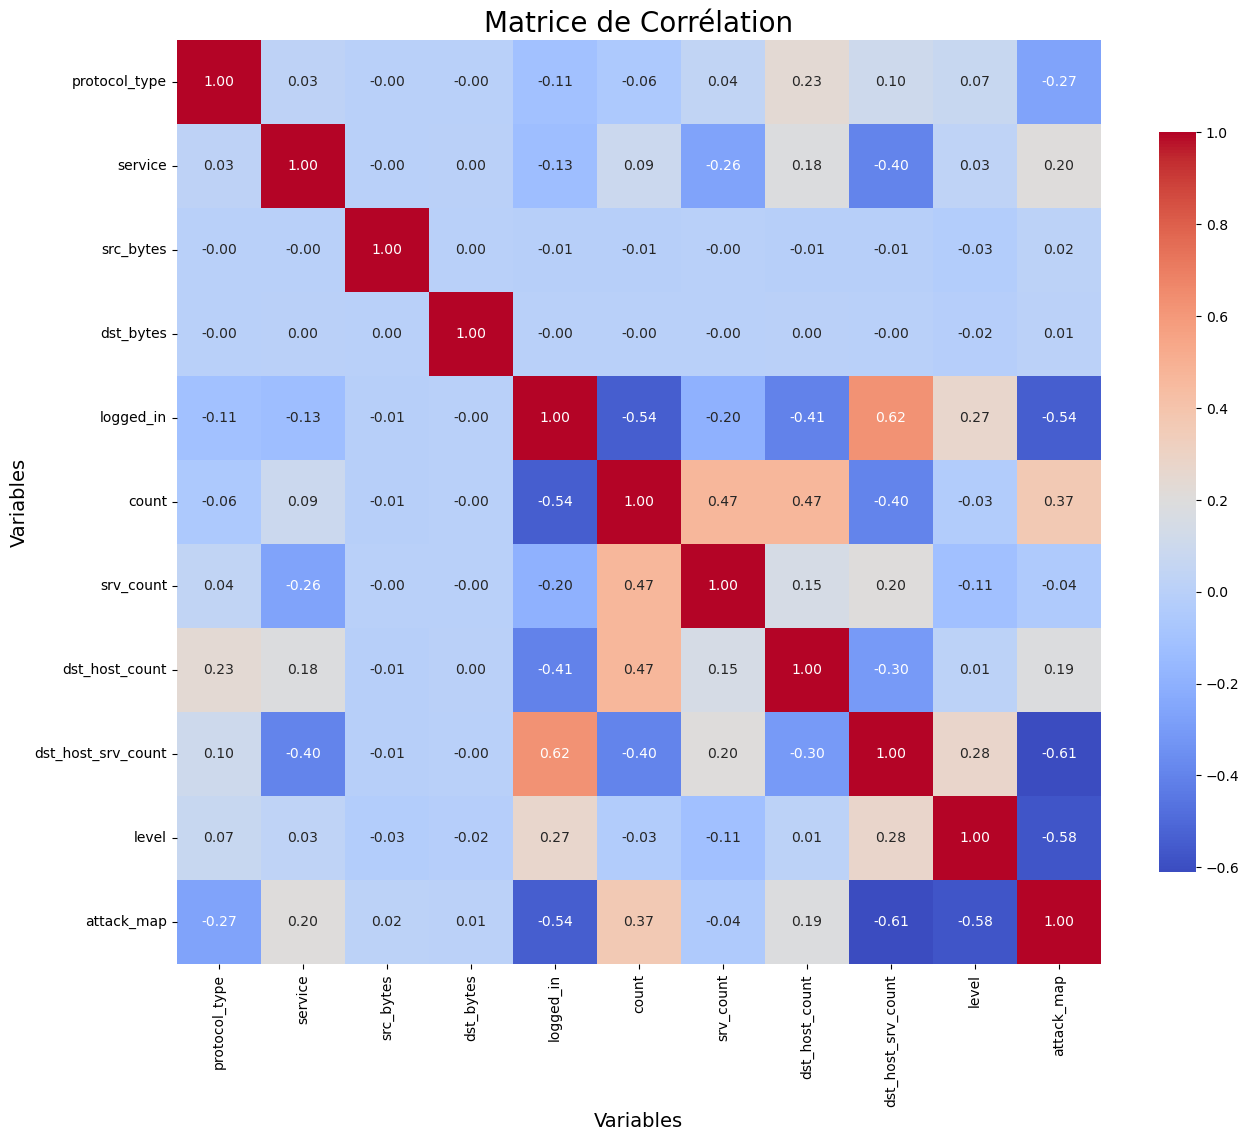

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df est déjà chargé avec votre dataset

# Supprimer les colonnes avec NaN
df = df.dropna(axis='columns')

# Garder les colonnes ayant plus d'une valeur unique et qui sont numériques
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]

# Calculer la matrice de corrélation
corr = ndf.corr()

# Configurer la taille de la figure
plt.figure(figsize=(15, 12))

# Créer la heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Ajouter des titres et des labels
plt.title('Matrice de Corrélation', fontsize=20)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Afficher la heatmap
plt.show()


## Réduction de dimensions avec le PCA

Le PCA est une technique de réduction de dimensionnalité qui transforme un dataset multivarié en un nouveau dataset avec moins de dimensions, tout en préservant la variance.

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que X_scaled_df contient déjà les données mises à l'échelle
X_scaled = X_scaled_df.values  # Convertir le DataFrame en un tableau NumPy si nécessaire

# Standardiser les données 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)  # Applique la normalisation sur les données mises à l'échelle

# Appliquer PCA pour conserver 95% de la variance
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_pca = pca.fit_transform(X_scaled)  # Entraîne la PCA sur les données et transforme ces données

# Afficher le nombre de composantes principales sélectionnées
print(f"Nombre de composantes principales sélectionnées : {pca.n_components_}")

# Afficher la variance expliquée par chaque composante principale
print("Proportion de la variance expliquée par chaque composante principale :")
print(pca.explained_variance_ratio_)  # Affiche la proportion de la variance expliquée par chaque composante principale

# Afficher la variance totale expliquée
total_variance_explained = sum(pca.explained_variance_ratio_)
print("Variance totale expliquée par les composantes sélectionnées :", total_variance_explained)  # Affiche la somme de la variance expliquée


Nombre de composantes principales sélectionnées : 8
Proportion de la variance expliquée par chaque composante principale :
[0.25832488 0.15495522 0.1239642  0.10124154 0.1000035  0.09563879
 0.06293787 0.05348336]
Variance totale expliquée par les composantes sélectionnées : 0.9505493705286754


In [46]:
X = X_pca  
y = df['attack_map']  # Utiliser la colonne attack_map comme étiquettes


## Diviser les données en ensembles d'entraînement et de test

In [48]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Arbres de décision

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialiser le modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)

# Entraîner le modèle avec les données d'entraînement
decision_tree_model.fit(X_train, y_train)

# Prédire les résultats sur les données de test
y_pred = decision_tree_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print("Précision du modèle d'arbre de décision :", accuracy)
print("\nMatrice de confusion :\n", confusion_mat)
print("\nRapport de classification :\n", class_report)


Précision du modèle d'arbre de décision : 0.9881853179344219

Matrice de confusion :
 [[8077   28   20    0    6]
 [  13 5351   25    0    1]
 [  14   50 1359    1    6]
 [   0    1    0    1    0]
 [   4    6    2    1  100]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8131
           1       0.98      0.99      0.99      5390
           2       0.97      0.95      0.96      1430
           3       0.33      0.50      0.40         2
           4       0.88      0.88      0.88       113

    accuracy                           0.99     15066
   macro avg       0.83      0.86      0.85     15066
weighted avg       0.99      0.99      0.99     15066



## SVM

In [52]:
# Import des bibliothèques nécessaires pour SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèle SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Affichage des métriques
print("Précision de SVM :", accuracy_score(y_test, y_pred_svm))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_svm))
print("Rapport de classification :\n", classification_report(y_test, y_pred_svm, zero_division=1))

Précision de SVM : 0.9759060135404222
Matrice de confusion :
 [[8017   53   48    0   13]
 [  34 5309   43    0    4]
 [  14  138 1275    0    3]
 [   0    0    0    0    2]
 [   5    2    4    0  102]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8131
           1       0.96      0.98      0.97      5390
           2       0.93      0.89      0.91      1430
           3       1.00      0.00      0.00         2
           4       0.82      0.90      0.86       113

    accuracy                           0.98     15066
   macro avg       0.94      0.75      0.75     15066
weighted avg       0.98      0.98      0.98     15066



## Réseaux de neurones

In [54]:
# Import des bibliothèques nécessaires pour le réseau de neurones
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèle de Réseau de Neurones
neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict(X_test)

# Affichage des métriques
print("Précision du réseau de neurones :", accuracy_score(y_test, y_pred_nn))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_nn))
print("Rapport de classification :\n", classification_report(y_test, y_pred_nn))

Précision du réseau de neurones : 0.9899110580114164
Matrice de confusion :
 [[8059   28   33    0   11]
 [   7 5351   32    0    0]
 [   8   23 1396    2    1]
 [   1    0    0    0    1]
 [   2    1    1    1  108]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8131
           1       0.99      0.99      0.99      5390
           2       0.95      0.98      0.97      1430
           3       0.00      0.00      0.00         2
           4       0.89      0.96      0.92       113

    accuracy                           0.99     15066
   macro avg       0.77      0.78      0.77     15066
weighted avg       0.99      0.99      0.99     15066



## Naive Bayes

In [56]:
# Import des bibliothèques nécessaires pour Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèle Naive Bayes Gaussien
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Affichage des métriques
print("Précision de Naive Bayes :", accuracy_score(y_test, y_pred_nb))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_nb))
print("Rapport de classification :\n", classification_report(y_test, y_pred_nb, zero_division=1))


Précision de Naive Bayes : 0.8850391610248242
Matrice de confusion :
 [[7669  392   27    7   36]
 [ 153 5055   89    3   90]
 [ 174  668  530   29   29]
 [   0    0    0    1    1]
 [   8    1    1   24   79]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8131
           1       0.83      0.94      0.88      5390
           2       0.82      0.37      0.51      1430
           3       0.02      0.50      0.03         2
           4       0.34      0.70      0.45       113

    accuracy                           0.89     15066
   macro avg       0.59      0.69      0.56     15066
weighted avg       0.89      0.89      0.88     15066



## Régression Logistique

In [58]:
# Import des bibliothèques nécessaires pour la Régression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèle de Régression Logistique
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Affichage des métriques
print("Précision de la Régression Logistique :", accuracy_score(y_test, y_pred_lr))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_lr))
print("Rapport de classification :\n", classification_report(y_test, y_pred_lr, zero_division=1))


Précision de la Régression Logistique : 0.9072082835523696
Matrice de confusion :
 [[7780  243   95    0   13]
 [ 103 5079  167    0   41]
 [ 134  557  732    6    1]
 [   1    0    0    0    1]
 [  20    6    9    1   77]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8131
           1       0.86      0.94      0.90      5390
           2       0.73      0.51      0.60      1430
           3       0.00      0.00      0.00         2
           4       0.58      0.68      0.63       113

    accuracy                           0.91     15066
   macro avg       0.63      0.62      0.62     15066
weighted avg       0.90      0.91      0.90     15066



## Gradient Boosting

In [60]:
# Import des bibliothèques nécessaires pour Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèle de Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Affichage des métriques
print("Précision de Gradient Boosting :", accuracy_score(y_test, y_pred_gb))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_gb))
print("Rapport de classification :\n", classification_report(y_test, y_pred_gb, zero_division=1))


Précision de Gradient Boosting : 0.9849329616354706
Matrice de confusion :
 [[8058   34   33    0    6]
 [  30 5329   29    0    2]
 [  17   47 1360    1    5]
 [   0    1    1    0    0]
 [   8    6    4    3   92]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8131
           1       0.98      0.99      0.99      5390
           2       0.95      0.95      0.95      1430
           3       0.00      0.00      0.00         2
           4       0.88      0.81      0.84       113

    accuracy                           0.98     15066
   macro avg       0.76      0.75      0.75     15066
weighted avg       0.99      0.98      0.98     15066



## Comparaison des modèles

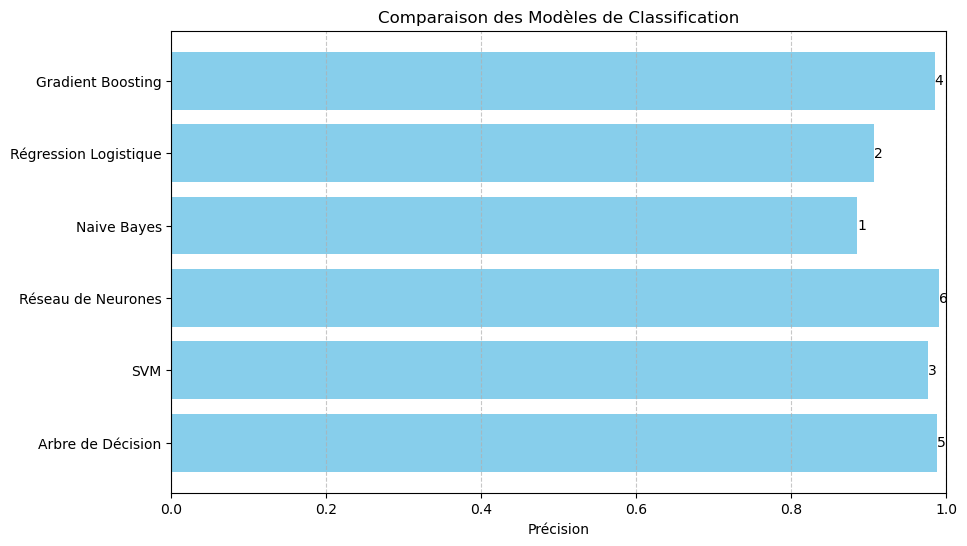

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Précisions obtenues pour chaque modèle
model_names = [
    "Arbre de Décision",
    "SVM",
    "Réseau de Neurones",
    "Naive Bayes",
    "Régression Logistique",
    "Gradient Boosting"
]

accuracies = [
    0.9881,  # Arbre de Décision
    0.9759,  # SVM
    0.9899,  # Réseau de Neurones
    0.8850,  # Naive Bayes
    0.9072,  # Régression Logistique
    0.9849   # Gradient Boosting
]

# Création du graphique
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(model_names))

bars = plt.barh(y_pos, accuracies, color='skyblue')
plt.xlabel('Précision')
plt.title('Comparaison des Modèles de Classification')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajout des classements
ranking = np.argsort(np.argsort(accuracies)) + 1  # Classement des précisions
for bar, rank in zip(bars, ranking):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             str(rank), va='center', ha='left', color='black')

# Réajustement des noms des modèles pour l'axe y
plt.yticks(y_pos, model_names)
plt.show()


In [63]:
import pandas as pd

# Modèles et leurs précisions
model_names = [
    "Arbre de Décision",
    "SVM",
    "Réseau de Neurones",
    "Naive Bayes",
    "Régression Logistique",
    "Gradient Boosting"
]

accuracies = [
    0.9881,  # Arbre de Décision
    0.9759,  # SVM
    0.9899,  # Réseau de Neurones
    0.8850,  # Naive Bayes
    0.9072,  # Régression Logistique
    0.9849   # Gradient Boosting
]

# Création d'un DataFrame avec pandas
results_df = pd.DataFrame({
    'Modèle': model_names,
    'Précision': accuracies
})

# Affichage des résultats
print("Précisions des Modèles de Classification :\n")
print(results_df)


Précisions des Modèles de Classification :

                  Modèle  Précision
0      Arbre de Décision     0.9881
1                    SVM     0.9759
2     Réseau de Neurones     0.9899
3            Naive Bayes     0.8850
4  Régression Logistique     0.9072
5      Gradient Boosting     0.9849


## Ajustement des hyperparamètres avec Grid Search

### Arbre de décision

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir les hyperparamètres à tester pour l'arbre de décision
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle et GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Meilleurs paramètres et évaluation du modèle
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Précision de l'arbre de décision :", accuracy_score(y_test, y_pred_dt))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_dt))
print("Rapport de classification :\n", classification_report(y_test, y_pred_dt))
print("Meilleurs hyperparamètres pour l'arbre de décision :", grid_search_dt.best_params_)


Précision de l'arbre de décision : 0.9923005442718704
Matrice de confusion :
 [[8094   14   17    0    6]
 [  14 5353   23    0    0]
 [  11   20 1397    1    1]
 [   0    0    0    1    1]
 [   5    2    0    1  105]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8131
           1       0.99      0.99      0.99      5390
           2       0.97      0.98      0.97      1430
           3       0.33      0.50      0.40         2
           4       0.93      0.93      0.93       113

    accuracy                           0.99     15066
   macro avg       0.84      0.88      0.86     15066
weighted avg       0.99      0.99      0.99     15066

Meilleurs hyperparamètres pour l'arbre de décision : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


### SVM

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir les hyperparamètres à tester pour SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Initialiser le modèle et GridSearchCV
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Meilleurs paramètres et évaluation du modèle
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Précision de SVM :", accuracy_score(y_test, y_pred_svm))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_svm))
print("Rapport de classification :\n", classification_report(y_test, y_pred_svm, zero_division=1))
print("Meilleurs hyperparamètres pour SVM :", grid_search_svm.best_params_)


Précision de SVM : 0.9877870702243462
Matrice de confusion :
 [[8063   33   24    0   11]
 [  14 5344   32    0    0]
 [  25   35 1368    1    1]
 [   0    0    0    0    2]
 [   5    0    0    1  107]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8131
           1       0.99      0.99      0.99      5390
           2       0.96      0.96      0.96      1430
           3       0.00      0.00      0.00         2
           4       0.88      0.95      0.91       113

    accuracy                           0.99     15066
   macro avg       0.77      0.78      0.77     15066
weighted avg       0.99      0.99      0.99     15066

Meilleurs hyperparamètres pour SVM : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### Réseaux de neurones

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir les hyperparamètres à tester pour le réseau de neurones
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialiser le modèle et GridSearchCV
neural_network = MLPClassifier(max_iter=300, random_state=42)
grid_search_nn = GridSearchCV(neural_network, param_grid_nn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nn.fit(X_train, y_train)

# Meilleurs paramètres et évaluation du modèle
best_nn = grid_search_nn.best_estimator_
y_pred_nn = best_nn.predict(X_test)

print("Précision du réseau de neurones :", accuracy_score(y_test, y_pred_nn))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_nn))
print("Rapport de classification :\n", classification_report(y_test, y_pred_nn))
print("Meilleurs hyperparamètres pour le réseau de neurones :", grid_search_nn.best_params_)


Précision du réseau de neurones : 0.9943581574405947
Matrice de confusion :
 [[8107    7   13    0    4]
 [  10 5372    8    0    0]
 [   7   25 1396    2    0]
 [   1    0    0    0    1]
 [   5    1    0    1  106]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8131
           1       0.99      1.00      1.00      5390
           2       0.99      0.98      0.98      1430
           3       0.00      0.00      0.00         2
           4       0.95      0.94      0.95       113

    accuracy                           0.99     15066
   macro avg       0.79      0.78      0.78     15066
weighted avg       0.99      0.99      0.99     15066

Meilleurs hyperparamètres pour le réseau de neurones : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
